In [1]:
import tensorflow as tf
import numpy as np

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_validation = X_train[:5000]
y_validation = y_train[:5000]
X_train = X_train[5000:]
y_train = y_train[5000:]

X_train = X_train.astype('float32') / 255.0
X_validation = X_validation.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_train = tf.expand_dims(X_train, axis=-1)
X_validation = tf.expand_dims(X_validation, axis=-1)
X_test = tf.expand_dims(X_test, axis=-1)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_validation = tf.keras.utils.to_categorical(y_validation, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

#X_train = tf.image.resize_with_crop_or_pad(X_train, 32, 32)
#X_validation = tf.image.resize_with_crop_or_pad(X_validation, 32, 32)
#X_test = tf.image.resize_with_crop_or_pad(X_test, 32, 32)

X_train = np.pad(X_train, ((0,0), (2,2), (2,2), (0,0)), 'constant')
X_validation = np.pad(X_validation, ((0,0), (2,2), (2,2), (0,0)), 'constant')
X_test = np.pad(X_test, ((0,0), (2,2), (2,2), (0,0)), 'constant')

print('Training images shape:', X_train.shape) # should be (55000, 32, 32, 1)
print('Training labels shape:', y_train.shape) # should be (55000, 10)
print('Validation images shape:', X_validation.shape) # should be (5000, 32, 32, 1)
print('Validation labels shape:', y_validation.shape) # should be (5000, 10)
print('Test images shape:', X_test.shape) # should be (10000, 32, 32, 1)
print('Test labels shape:', y_test.shape) # should be (10000, 10)


Training images shape: (55000, 32, 32, 1)
Training labels shape: (55000, 10)
Validation images shape: (5000, 32, 32, 1)
Validation labels shape: (5000, 10)
Test images shape: (10000, 32, 32, 1)
Test labels shape: (10000, 10)


In [2]:
assert (len(X_train) == len(y_train))
assert (len(X_validation) == len(y_validation))
assert (len(X_test) == len(y_test))

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


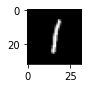

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index]

plt.figure(figsize = (1,1))
plt.imshow(image, cmap = "gray")
print(y_train[index])


In [4]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [5]:
import tensorflow as tf
EPOCHS=2
BATCH_SIZE=128

In [6]:
#from tensorflow.contrib.layers import flatten

def flatten(input_tensor):
    # Get the shape of the input tensor
    input_shape = input_tensor.get_shape().as_list()
    # Compute the size of the flattened tensor
    flatten_size = input_shape[1] * input_shape[2] * input_shape[3]
    # Reshape the input tensor to a flattened shape
    flattened_tensor = tf.reshape(input_tensor, [-1, flatten_size])
    return flattened_tensor

def LeNet(x):
    mu = 0
    sigma = 0.1
    
    conv1_w = tf.Variable(tf.random.truncated_normal(shape = [5,5,1,6], mean = mu, stddev = sigma ))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_w, strides = [1,1,1,1], padding = 'VALID') + conv1_b
    
    conv1 = tf.nn.relu(conv1)
    pool_1 = tf.nn.max_pool(conv1, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    
    conv2_w = tf.Variable(tf.random.truncated_normal(shape = [5,5,6,16], mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(pool_1, conv2_w, strides = [1,1,1,1], padding = 'VALID') + conv2_b
    
    conv2 = tf.nn.relu(conv2)
    pool_2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    fc1 = flatten(pool_2)
    
    fc1_w = tf.Variable(tf.random.truncated_normal(shape = (400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc1, fc1_w) + fc1_b
    fc1 = tf.nn.relu(fc1)
    
    fc2_w = tf.Variable(tf.random.truncated_normal(shape = (120, 84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2   = tf.matmul(fc1, fc2_w) + fc2_b
    fc2 = tf.nn.relu(fc2)
    
    fc3_w = tf.Variable(tf.random.truncated_normal(shape = (84,10), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(10))
    logits = tf.matmul(fc2, fc3_w) + fc3_b
    return logits

In [7]:
tf.compat.v1.disable_eager_execution()
input_shape = (None, 32, 32, 1)
x = tf.compat.v1.placeholder(tf.float32, shape = input_shape)
y = tf.compat.v1.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 10)

Training the model...

EPOCH 1 ...
Training Loss = 0.090
Training Accuracy = 0.977
Validation Loss = 0.097
Validation Accuracy = 0.970

EPOCH 2 ...
Training Loss = 0.088
Training Accuracy = 0.955
Validation Loss = 0.069
Validation Accuracy = 0.979



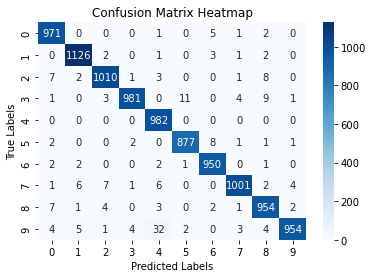

Test Accuracy = 0.981


In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
tf.compat.v1.disable_eager_execution()
graph = tf.compat.v1.Graph()

with graph.as_default():
    
    x = tf.compat.v1.placeholder(tf.float32, (None, 32, 32, 1))
    y = tf.compat.v1.placeholder(tf.float32, (None, 10))
    keep_prob = tf.compat.v1.placeholder(tf.float32)
    
    model = LeNet(x)
    
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=y)
    loss_operation = tf.reduce_mean(cross_entropy)
    
    optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate = 0.001)
    training_operation = optimizer.minimize(loss_operation)
    
    correct_prediction = tf.equal(tf.argmax(model, 1), tf.argmax(y, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    init = tf.compat.v1.global_variables_initializer()

with tf.compat.v1.Session(graph=graph) as sess:
    
    sess.run(init)
    
    num_examples = len(X_train)
    
    print("Training the model...")
    print()
    
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        #validation_accuracy = sess.run(accuracy_operation, feed_dict={x: X_validation, y: y_validation, keep_prob: 1.0})
        
        validation_loss, validation_accuracy = sess.run([loss_operation, accuracy_operation], feed_dict={x: X_validation, y: y_validation, keep_prob: 1.0})
        training_loss, training_accuracy = sess.run([loss_operation, accuracy_operation], feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        
        
        print("EPOCH {} ...".format(i+1))
        print("Training Loss = {:.3f}".format(training_loss))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Loss = {:.3f}".format(validation_loss))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    
    predicted_labels = sess.run(tf.argmax(model, 1), feed_dict={x: X_test, keep_prob: 1.0})
    true_labels = np.argmax(y_test, axis=1)
    conf_matrix = confusion_matrix(true_labels, predicted_labels)
    

    ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")

    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')

    ax.set_title('Confusion Matrix Heatmap')

    plt.show()

        test_accuracy = sess.run(accuracy_operation, feed_dict={x: X_test, y: y_test, keep_prob: 1.0})
    print("Test Accuracy = {:.3f}".format(test_accuracy))
